# Portfolio Optimization using Multiple Regression

### Imports

In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore') 

In [63]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Data Collection and Manipulation

Randomly chosen tickers (approximately 100)

In [4]:
technology = ["GOOGL", "TSLA", "AAPL", "MSFT", "NVDA", "INTC", "ADBE", "CRM", "IBM"]
consumer_discretionary = ["HD", "NKE", "MCD", "SBUX", "TGT", "LOW", "GM", "F"]
communication_services = ["META", "NFLX", "DIS", "CMCSA", "CHTR", "T", "VZ"]
consumer_staples = ["PG", "WMT", "KO", "PEP", "COST", "CL", "MDLZ", "KHC", "PM", "MO"]
energy = ["XOM", "CVX", "COP", "SLB", "KMI", "OXY", "PSX", "MPC", "EOG"]
financials = ["JPM", "BAC", "WFC", "C", "GS", "MS", "AXP", "V", "MA"]
healthcare = ["JNJ", "PFE", "MRK", "UNH", "ABT", "AMGN", "BMY", "MDT", "TMO"]
industrials = ["BA", "HON", "UPS", "MMM", "CAT", "UNP", "GE", "FDX", "RTX", "LMT"]
materials = ["ECL", "DD", "LIN", "SHW", "APD", "NEM", "FCX", "IP"]
real_estate = ["AMT", "PLD", "SPG", "CCI", "EQR", "PSA", "AVB", "O", "DLR"]
utilities = ["NEE", "DUK", "D", "SO", "AEP", "EXC", "ED", "SRE", "PEG"]

In [5]:
tickers = [technology, consumer_discretionary, communication_services, consumer_staples,
          energy, financials, healthcare, industrials, materials, real_estate, utilities]

#### Check if 'tickers' list has Multiple Occurances and Convert to Single Occurances

In [6]:
def check_ticker_occurances():
    # O(n) complexity
    for itr in range(len(tickers)):        
        # use set data structure to check for uniques
        if(len(set(tickers[itr])) != len(tickers[itr])):
            return True
    return False

def remove_multiple_ticker_occurances():
    # O(n) time complexity
    for itr in range(len(tickers)):
        if(len(set(tickers[itr])) != len(tickers[itr])):
            tickers[itr] = list(set(tickers[itr]))
    print(f'Removed Multiple Occurances of Tickers!')

if check_ticker_occurances():
    print(f'Multiple occurances of tickers found!')
    remove_multiple_ticker_occurances()
else:
    print(f'Single Occurances found!')

Single Occurances found!


#### Download 6 years of stock data from Yahoo Finance

In [7]:
data_technology = yf.download(technology, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_consumer_discretionary = yf.download(consumer_discretionary, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_communication_services = yf.download(communication_services, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_consumer_staples = yf.download(consumer_staples, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_energy = yf.download(energy, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_financials = yf.download(financials, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_healthcare = yf.download(healthcare, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_industrials = yf.download(industrials, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_materials = yf.download(materials, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_real_estate = yf.download(real_estate, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_utilities = yf.download(utilities, start="2018-01-01", end="2024-01-01")["Adj Close"]

[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed


In [8]:
data_tickers = [data_technology, data_consumer_discretionary, data_communication_services, data_consumer_staples, 
               data_energy, data_financials, data_healthcare, data_industrials, data_materials, data_real_estate, data_utilities]

In [9]:
data_technology.head()

Ticker,AAPL,ADBE,CRM,GOOGL,IBM,INTC,MSFT,NVDA,TSLA
Date,,,,,,,,,
2018-01-02,40.670979,177.699997,104.273796,53.660500,109.547668,39.740639,80.080925,49.310474,21.368668
2018-01-03,40.663891,181.039993,105.152641,54.576000,112.558929,38.391918,80.453598,52.555790,21.150000
2018-01-04,40.852783,183.220001,106.540833,54.787998,114.838654,37.687878,81.161705,52.832832,20.974667
2018-01-05,41.317902,185.339996,107.958977,55.514500,115.399719,37.950836,82.167961,53.280537,21.105333
2018-01-08,41.164429,185.039993,108.717987,55.710499,116.095688,37.950836,82.251801,54.913101,22.427334


In [10]:
data_financials.head()

Ticker,AXP,BAC,C,GS,JPM,MA,MS,V,WFC
Date,,,,,,,,,
2018-01-02,90.506500,25.813889,60.055382,222.359299,90.125504,146.724640,43.327946,109.733643,50.917591
2018-01-03,91.064507,25.727560,60.241127,220.289398,90.217339,148.569458,43.444183,110.826096,51.309349
2018-01-04,92.579178,26.064260,60.984165,223.368179,91.509758,150.491577,44.108337,111.238167,51.951122
2018-01-05,92.790329,26.185129,60.903397,222.228897,90.922302,153.611267,44.091724,113.902214,52.301186
2018-01-08,91.936592,26.003830,60.192684,219.002228,91.056580,154.075592,43.909088,114.362175,51.709419


#### Check Five-Point Statistics of the Technology Sector

In [11]:
data_technology.describe()

Ticker,AAPL,ADBE,CRM,GOOGL,IBM,INTC,MSFT,NVDA,TSLA
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,108.703984,392.130424,185.819635,91.191814,113.194444,43.167985,208.665322,157.322924,145.981504
std,51.349589,126.950047,44.942261,31.348486,15.004272,8.353558,84.088719,122.337774,113.530192
min,34.075397,177.699997,103.894287,49.233501,74.493599,24.072258,79.205116,31.521746,11.931333
25%,51.655396,277.570007,151.372269,60.221001,103.101746,38.362076,129.248657,59.652126,22.271334
50%,121.447418,373.440002,176.409561,88.019997,110.418297,44.100735,216.065125,131.212006,160.190002
75%,151.446198,489.269989,218.514557,119.699997,121.654526,49.373737,278.286041,212.313400,242.190002
max,197.857529,688.369995,309.555634,149.838501,163.221939,62.730934,381.993622,504.022034,409.970001


#### Visualize Each Sector Data

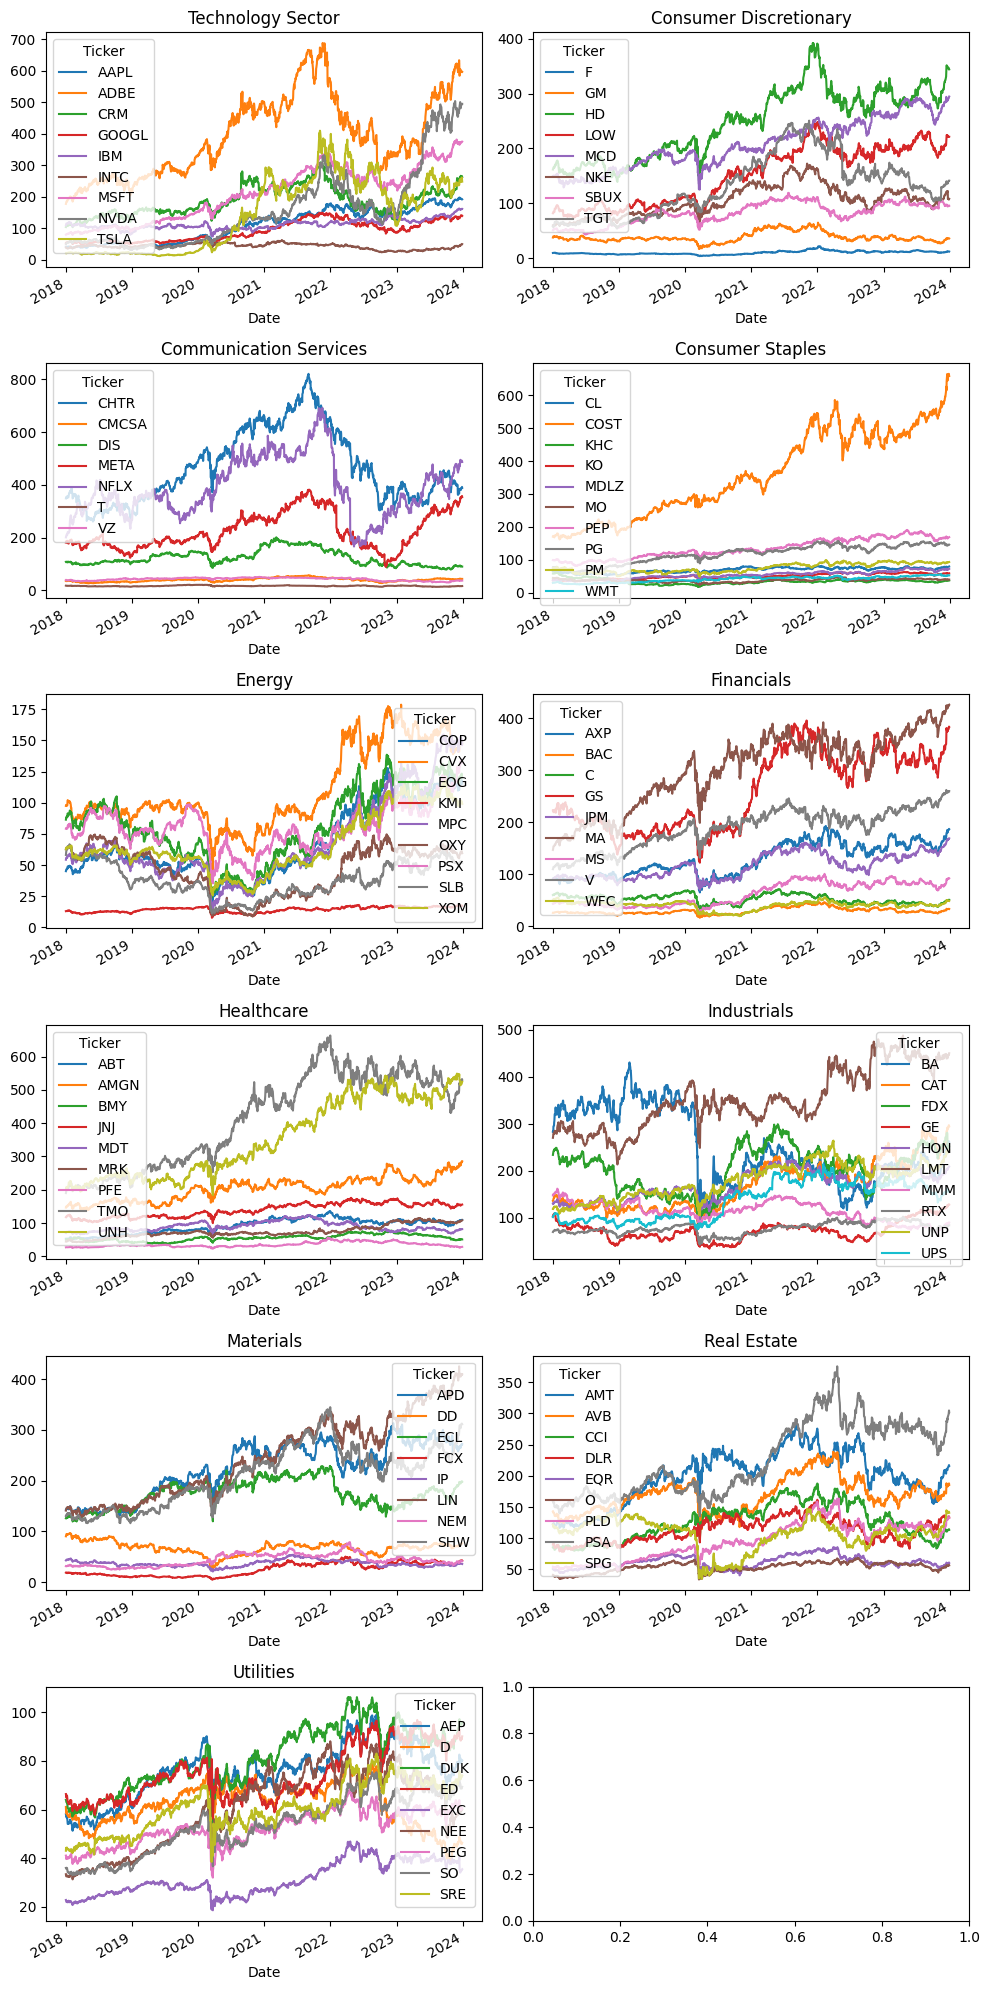

In [12]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (10, 20))

data_technology.plot(ax = axes[0][0], title = 'Technology Sector', legend = True)
data_consumer_discretionary.plot(ax=axes[0][1], title = 'Consumer Discretionary', legend = True)
data_communication_services.plot(ax = axes[1][0], title = 'Communication Services', legend = True)
data_consumer_staples.plot(ax=axes[1][1], title = 'Consumer Staples', legend = True)
data_energy.plot(ax = axes[2][0], title = 'Energy', legend = True)
data_financials.plot(ax=axes[2][1], title = 'Financials', legend = True)
data_healthcare.plot(ax = axes[3][0], title = 'Healthcare', legend = True)
data_industrials.plot(ax=axes[3][1], title = 'Industrials', legend = True)
data_materials.plot(ax = axes[4][0], title = 'Materials', legend = True)
data_real_estate.plot(ax=axes[4][1], title = 'Real Estate', legend = True)
data_utilities.plot(ax = axes[5][0], title = 'Utilities', legend = True)

plt.tight_layout()

plt.show()

## Feature Engineering

#### 1. Calculate log returns

In [13]:
data_log_returns = []

# Always keep the sector order in ALL lists maintained

def calc_log_returns():    
    for sector in data_tickers:
        new_df = pd.DataFrame()
        new_df = sector.apply(lambda x: np.log(x) - np.log(x.shift(1)))
        new_df = new_df.iloc[1:]
        data_log_returns.append(new_df)

calc_log_returns()

#### 2. Calculate P/E Ratio

In [14]:
# Maintaining sector and ticker order

data_PE = []

def calc_pe_ratio():
    for sector in tickers:
        # sector is the tickers name list
        # ticker_names = sector -> hence this is not required
        PE_ratio = []
        for ticker in sector:
            ticker_info = yf.Ticker(ticker).info
            PE_ratio.append(ticker_info["forwardPE"]) if "forwardPE" in ticker_info else PE_ratio.append(None)
        dict = {"Ticker": sector, "P/E": PE_ratio}
        data_PE.append(pd.DataFrame(dict))

calc_pe_ratio()

#### 3. Calculate Beta

In [53]:
data_sp500 = yf.download("^GSPC", start = "2018-01-01", end = "2024-01-01")["Adj Close"]

# Daily Returns of S&P500
daily_returns_sp500 = data_sp500.pct_change()

# Variance of S&P500
variance_sp500 = data_sp500.pct_change().var()

# Daily Returns of All Stocks
daily_returns_individual_stocks = []

[*********************100%%**********************]  1 of 1 completed


In [54]:
# Calculate daily returns of all stocks

def calc_daily_returns_tickers():
    for sector in data_tickers:
        new_df = pd.DataFrame()
        for ticker in list(sector.columns):
            new_df[ticker] = sector[ticker].pct_change() 
            new_df = new_df.iloc[1:]
        daily_returns_individual_stocks.append(new_df)

calc_daily_returns_tickers()

In [55]:
# Calculate Beta of All Stocks

data_beta = []

def calc_beta():
    for sector in range(len(daily_returns_individual_stocks)):
        beta_tickers = []
        for ticker in list(daily_returns_individual_stocks[sector].columns):
            # calculate covariance
            covariance = daily_returns_individual_stocks[sector][ticker].cov(daily_returns_sp500)
            # calculate beta value
            beta = covariance / variance_sp500
            beta_tickers.append(beta)
        tickers = list(daily_returns_individual_stocks[sector].columns)
        dict = {"Ticker": tickers, "Beta": beta_tickers}
        data_beta.append(pd.DataFrame(dict))
        
calc_beta()

#### 4. Correlation between Assets

In [57]:
data_correlation_matrix = []

def corr_matrix():
    for sector in data_tickers:
        data_correlation_matrix.append(sector.corr())

corr_matrix()

In [60]:
data_correlation_matrix[0]

Ticker,AAPL,ADBE,CRM,GOOGL,IBM,INTC,MSFT,NVDA,TSLA
Ticker,,,,,,,,,
AAPL,1.000000,0.781601,0.675187,0.927587,0.702155,-0.288615,0.979089,0.875902,0.922620
ADBE,0.781601,1.000000,0.935026,0.861852,0.419498,0.221888,0.848030,0.718061,0.796144
CRM,0.675187,0.935026,1.000000,0.756851,0.245327,0.294216,0.739786,0.598534,0.717622
GOOGL,0.927587,0.861852,0.756851,1.000000,0.657441,-0.085296,0.951298,0.836681,0.933919
IBM,0.702155,0.419498,0.245327,0.657441,1.000000,-0.410572,0.692032,0.763481,0.539574
INTC,-0.288615,0.221888,0.294216,-0.085296,-0.410572,1.000000,-0.188942,-0.294907,-0.132703
MSFT,0.979089,0.848030,0.739786,0.951298,0.692032,-0.188942,1.000000,0.899097,0.903487
NVDA,0.875902,0.718061,0.598534,0.836681,0.763481,-0.294907,0.899097,1.000000,0.742274
TSLA,0.922620,0.796144,0.717622,0.933919,0.539574,-0.132703,0.903487,0.742274,1.000000


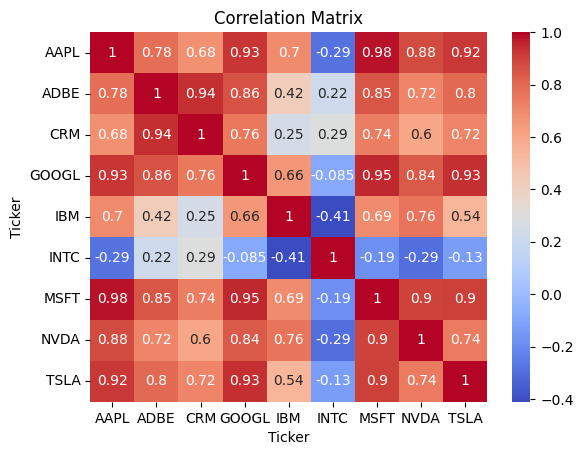

In [64]:
sns.heatmap(data_correlation_matrix[0], annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [62]:
type(data_correlation_matrix[0])

pandas.core.frame.DataFrame

## Regression Analysis

In [ ]:
x = 

In [ ]:
dict = {'Ticker': list((correlation_matrix.index)), 'Correlation_PCA': reduced_vector}
correlation_pca_matrix = pd.DataFrame(dict)

In [ ]:
independent_features = log_returns
independent_features = independent_features.T

In [ ]:
independent_features.reset_index(inplace=True)  # Reset index and make the current index a normal column
independent_features.rename(columns={'index': 'Ticker'}, inplace=True)  # Rename the old index column if needed
independent_features.index = range(1, len(independent_features) + 1)  # Set new index column with serial numbers starting from 1
independent_features.head()

#### Inner Joins

In [ ]:
independent_features = pd.merge(independent_features, PE_data, how ='inner', on ='Ticker')
independent_features = pd.merge(independent_features, betas, how ='inner', on ='Ticker')
independent_features = pd.merge(independent_features, correlation_pca_matrix, how ='inner', on ='Ticker')

In [ ]:
independent_features.head()

In [ ]:
X = independent_features
Y = daily_returns_individual_stocks.T

X

In [ ]:
Y

In [ ]:
X = independent_features
Y = daily_returns_individual_stocks.T

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model (for demonstration purposes)
score = model.score(X_test, y_test)
print("R-squared score:", score)

# X = sm.add_constant(X)  # Add constant term
# model = sm.OLS(y, X).fit()  # Fit regression model
# print(model.summary())  # Display regression summary